# VARLiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [67]:
import os
os.environ["PATH"] += os.pathsep + '/Users/elena/opt/anaconda3/lib/python3.7/site-packages/graphviz'

In [68]:
from sklearn.preprocessing import StandardScaler

In [70]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(8)

['1.17.2', '0.25.1', '0.14', '1.2.1']


## Test data
We create test data consisting of 5 variables.

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
df = pd.read_csv('/Users/elena/Documents/Диплом/Data/russia.csv')

In [73]:
df['lnGDP'] = np.log(df['gdp'])
df['lnCO2'] = np.log(df['x5'])
df['lnEn'] = np.log(df['x11'])

In [99]:
df['dlnGDP']=df['lnGDP'].diff()
df['dlnCO2'] = df['lnCO2'].diff()
df['dlnEn'] = df['lnEn'].diff()
df['dlnTr'] = df['lntr'].diff()

In [100]:
X_raw = df[['temp', 'dlnGDP', 'dlnCO2', 'dlnEn', 'dlnTr']]

In [101]:
X_raw

,temp,dlnGDP,dlnCO2,dlnEn,dlnTr
0,-6.11068,NaN,NaN,NaN,NaN
1,-5.71303,-0.078599,-0.068703,-0.064830,-0.090092
2,-6.10001,-0.116346,-0.130973,-0.097810,-0.009272
3,-4.28530,-0.019856,-0.040458,-0.017329,-0.050391
4,-5.84359,-0.026375,-0.009954,-0.016823,-0.033485
5,-5.42981,0.017708,-0.053765,-0.016243,-0.012897
6,-6.49114,-0.411294,-0.018538,-0.017906,0.170542
7,-5.98445,-0.335554,0.026636,0.030633,-0.017162
8,-5.67297,0.264022,0.021538,0.039148,-0.067484
9,-5.63369,0.148529,0.003989,0.014507,0.033460


In [102]:
standard_scaler = StandardScaler(with_std=False)
X = standard_scaler.fit_transform(X_raw)

In [103]:
#X = np.array(df[['temp', 'lnGDP', 'lnCO2', 'lnEn']])

In [105]:
# B0 = [
#     [0,-0.12,0,0,0],
#     [0,0,0,0,0],
#     [-0.41,0.01,0,-0.02,0],
#     [0.04,-0.22,0,0,0],
#     [0.15,0,-0.03,0,0],
# ]
# B1 = [
#     [-0.32,0,0.12,0.32,0],
#     [0,-0.35,-0.1,-0.46,0.4],
#     [0,0,0.37,0,0.46],
#     [-0.38,-0.1,-0.24,0,-0.13],
#     [0,0,0,0,0],
#  ]
causal_order = [3, 2, 1, 0, 0]

# data generated from B0 and B1
#X = pd.read_csv('data/sample_data_var_lingam.csv')

## Causal Discovery
To run causal discovery, we create a `VARLiNGAM` object and call the `fit` method.

In [106]:
model = lingam.VARLiNGAM()
model.fit(X[1:])

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [107]:
model.causal_order_

[3, 2, 4, 1, 0]

Also, using the `adjacency_matrices_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [108]:
model.adjacency_matrices_

array([[[0.   , 1.1  , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.686, 1.214, 0.   ],
        [0.   , 0.   , 0.   , 1.147, 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   , 0.   , 0.   ]]])

In [109]:
# B0
model.adjacency_matrices_[0]

array([[0.   , 1.1  , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.686, 1.214, 0.   ],
       [0.   , 0.   , 0.   , 1.147, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

In [110]:
# B1
model.adjacency_matrices_[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

We can draw a causal graph by utility funciton.

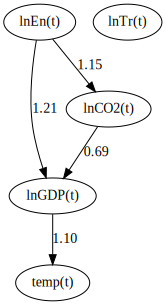

In [111]:
labels = ['temp(t)', 'lnGDP(t)', 'lnCO2(t)', 'lnEn(t)', 'lnTr(t)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

## Bootstrap

### Bootstrapping
We call `bootstrap()` method instead of `fit()`. Here, the second argument specifies the number of bootstrap sampling.

In [112]:
model = lingam.VARLiNGAM()
result = model.bootstrap(X[1:], 100)

In [118]:
labels = ['temp(t)', 'dlnGDP(t)', 'dlnCO2(t)', 'dlnEn(t)', 'dlnTr']

Since `BootstrapResult` object is returned, we can get the ranking of the causal directions extracted by `get_causal_direction_counts()` method. In the following sample code, `n_directions` option is limited to the causal directions of the top 8 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.3 or more.

In [119]:
cdc = result.get_causal_direction_counts(n_directions=20, min_causal_effect=0.3, split_by_causal_effect_sign=True)

In [120]:
cdc

{'from': [6, 9, 9, 7, 8, 8, 8, 7, 8, 7, 8, 2, 3, 7, 7, 1, 2, 7, 3, 4],
 'to': [0, 0, 1, 4, 4, 1, 0, 1, 3, 0, 2, 3, 2, 2, 3, 0, 1, 0, 1, 0],
 'count': [100,
  100,
  100,
  100,
  99,
  98,
  92,
  84,
  80,
  69,
  64,
  50,
  50,
  45,
  44,
  34,
  31,
  29,
  21,
  15],
 'sign': [1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1]}

We can check the result by utility function.

In [121]:
print_causal_directions(cdc, 100, labels=labels)

IndexError: list index out of range

Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.2 or more.

In [220]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.2, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [221]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 36.0%
	temp(t) <--- dlnGDP(t) (b>0)
	temp(t) <--- temp(t-1) (b<0)
	temp(t) <--- dlnGDP(t-1) (b>0)
	temp(t) <--- dlnEn(t-1) (b<0)
	dlnGDP(t) <--- dlnCO2(t-1) (b<0)
	dlnGDP(t) <--- dlnEn(t-1) (b>0)
	dlnCO2(t) <--- dlnEn(t) (b>0)
	dlnEn(t) <--- dlnGDP(t) (b>0)
	dlnEn(t) <--- dlnGDP(t-1) (b<0)
	dlnEn(t) <--- dlnCO2(t-1) (b<0)
	dlnEn(t) <--- dlnEn(t-1) (b>0)
DAG[1]: 23.0%
	temp(t) <--- temp(t-1) (b<0)
	temp(t) <--- dlnGDP(t-1) (b>0)
	dlnGDP(t) <--- dlnCO2(t-1) (b<0)
	dlnGDP(t) <--- dlnEn(t-1) (b>0)
	dlnCO2(t) <--- dlnEn(t) (b>0)
	dlnEn(t) <--- dlnGDP(t-1) (b<0)
	dlnEn(t) <--- dlnCO2(t-1) (b<0)
	dlnEn(t) <--- dlnEn(t-1) (b>0)
DAG[2]: 23.0%
	temp(t) <--- temp(t-1) (b<0)
	temp(t) <--- dlnGDP(t-1) (b>0)
	dlnGDP(t) <--- dlnCO2(t-1) (b<0)
	dlnGDP(t) <--- dlnEn(t-1) (b>0)
	dlnCO2(t) <--- dlnEn(t) (b>0)
	dlnEn(t) <--- dlnGDP(t) (b>0)
	dlnEn(t) <--- dlnGDP(t-1) (b<0)
	dlnEn(t) <--- dlnCO2(t-1) (b<0)
	dlnEn(t) <--- dlnEn(t-1) (b>0)


Using the `get_probabilities()` method, we can get the probability of bootstrapping.

In [196]:
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of B0:\n', prob[0])
print('Probability of B1:\n', prob[1])

Probability of B0:
 [[0.   0.45 0.03 0.07]
 [0.31 0.   0.19 0.35]
 [0.02 0.24 0.   0.56]
 [0.06 0.24 0.44 0.  ]]
Probability of B1:
 [[1.   1.   0.29 0.45]
 [0.71 0.87 0.78 0.9 ]
 [0.15 0.53 0.57 0.77]
 [0.03 0.8  0.98 0.99]]
